In [1]:
from pandas_datareader.data import DataReader
import requests_cache
import pandas as pd
import numpy as np
from matplotlib import pyplot
import pandas_ta as pta

### Scrapping & Preparing Data from Web

In [2]:
session = requests_cache.CachedSession(cache_name='cache', backend='sqlite')

# just add headers to your session and provide it to the reader
session.headers = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:89.0) Gecko/20100101 Firefox/89.0',
                   'Accept': 'application/json;charset=utf-8'}

def get_adj_close(tickers, start_date, end_date):
    returns_df = pd.DataFrame()
    for ticker in tickers:
        # retrieve stock data (includes Date, OHLC, Volume, Adjusted Close)
        try:
          s = DataReader(ticker, 'yahoo', start_date, end_date, session=session)
          returns_df[ticker] = s['Adj Close']
        except:
          print(ticker)
    return returns_df

In [3]:
data = pd.read_csv('C:\\Users\\Guo Xiong\\Documents\\Y3S1\\BT4222\\Project\\Apple_sentiment.csv')
data = data.iloc[:,1:]
data = data.sort_values(by = 'Date')
data.head(2).append(data.tail(2))

,Date,Text,neg,neu,pos,compound,probability,sentiment
12425,2006-12-13,Apple seems to be humming right along. Its sto...,0.000,0.899,0.101,0.6808,0.991674,NEGATIVE
12059,2006-12-13,Apple Computer's shares are up after Morgan St...,0.083,0.792,0.125,0.2960,0.940315,NEGATIVE
11962,2021-11-11,U.S. stock futures were little changed in earl...,0.000,0.881,0.119,0.7003,0.999685,NEGATIVE
1290,2021-11-11,Disney's earnings report Wednesday told a fami...,0.000,0.898,0.102,0.5789,0.988439,NEGATIVE


In [4]:
AAPL_start_date = '2016-01-01'  # Using earlier dates for calculation of SMA later
AAPL_end_date = '2021-11-11'

In [5]:
AAPL_data = DataReader('AAPL', 'yahoo', AAPL_start_date, AAPL_end_date)
AAPL_data.columns = ['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']
AAPL_data['Movement'] = np.where(AAPL_data['Close'] > AAPL_data['Close'].shift(1),1,0)
AAPL_data['price_diff'] = AAPL_data['Close'].diff()
AAPL_data['TNX'] = DataReader('^TNX', 'yahoo', AAPL_start_date, AAPL_end_date)['Close']
#AAPL_data['Movement'] = np.where(AAPL_data['Close'] < AAPL_data['Close'].shift(-1),1,0)
#AAPL_data['price_diff'] = AAPL_data['Close'].diff().shift(-1)
AAPL_data.head(5).append(AAPL_data.tail(5))

,High,Low,Open,Close,Volume,Adj Close,Movement,price_diff,TNX
Date,,,,,,,,,
2015-12-31,26.757500,26.205000,26.752501,26.315001,163649200.0,24.230719,0,NaN,2.269
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.251438,1,0.022499,2.245
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.643709,0,-0.660000,2.248
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.181009,0,-0.502501,2.177
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.202667,0,-1.062500,2.153
2021-11-05,152.199997,150.059998,151.889999,151.279999,65414600.0,151.279999,1,0.319992,1.453
2021-11-08,151.570007,150.160004,151.410004,150.440002,55020900.0,150.440002,0,-0.839996,1.497
2021-11-09,151.429993,150.059998,150.199997,150.809998,56787900.0,150.809998,1,0.369995,1.432
2021-11-10,150.130005,147.850006,150.020004,147.919998,65187100.0,147.919998,0,-2.889999,1.560


In [6]:
#SMA
AAPL_data['SMA20'] = AAPL_data['Close'].rolling(window=20).mean() 
AAPL_data['SMA50'] = AAPL_data['Close'].rolling(window=50).mean() 
AAPL_data['SMA100'] = AAPL_data['Close'].rolling(window=100).mean() 

#EMA
AAPL_data['EMA10'] = AAPL_data['Close'].ewm(span=10, adjust=False).mean() 
AAPL_data['EMA20'] = AAPL_data['Close'].ewm(span=20, adjust=False).mean() 
AAPL_data['EMA40'] = AAPL_data['Close'].ewm(span=40, adjust=False).mean() 

#MACD
exp1 = AAPL_data['Close'].ewm(span=12, adjust=False).mean()
exp2 = AAPL_data['Close'].ewm(span=26, adjust=False).mean()
AAPL_data['MACD'] = exp1-exp2
AAPL_data['Signal'] = AAPL_data['MACD'].ewm(span=9, adjust=False).mean()

#RSI 
AAPL_data['RSI'] = pta.rsi(AAPL_data['Close'], length = 14)

In [7]:
AAPL_data

,High,Low,Open,Close,Volume,Adj Close,Movement,price_diff,TNX,SMA20,SMA50,SMA100,EMA10,EMA20,EMA40,MACD,Signal,RSI
Date,,,,,,,,,,,,,,,,,,
2015-12-31,26.757500,26.205000,26.752501,26.315001,163649200.0,24.230719,0,NaN,2.269,NaN,NaN,NaN,26.315001,26.315001,26.315001,0.000000,0.000000,NaN
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.251438,1,0.022499,2.245,NaN,NaN,NaN,26.319091,26.317143,26.316098,0.001795,0.000359,NaN
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.643709,0,-0.660000,2.248,NaN,NaN,NaN,26.202438,26.256225,26.284947,-0.049469,-0.009607,NaN
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.181009,0,-0.502501,2.177,NaN,NaN,NaN,26.015631,26.153251,26.230803,-0.129155,-0.033516,NaN
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.202667,0,-1.062500,2.153,NaN,NaN,NaN,25.669607,25.958894,26.127471,-0.274873,-0.081788,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-05,152.199997,150.059998,151.889999,151.279999,65414600.0,151.279999,1,0.319992,1.453,147.923001,147.5506,145.6864,150.029368,148.663586,147.492089,1.521095,1.165829,59.874833
2021-11-08,151.570007,150.160004,151.410004,150.440002,55020900.0,150.440002,0,-0.839996,1.497,148.304501,147.5874,145.8729,150.104029,148.832769,147.635890,1.467072,1.226077,56.887424
2021-11-09,151.429993,150.059998,150.199997,150.809998,56787900.0,150.809998,1,0.369995,1.432,148.769501,147.5412,146.0764,150.232387,149.021076,147.790724,1.437542,1.268370,57.884203


In [8]:
AAPL_data = AAPL_data.reset_index()
AAPL_data['Date'] = AAPL_data['Date'].apply(lambda x: x.strftime("%Y-%m-%dT%H:%M:%S")[:10]) #transform from datetime64 to date object
AAPL_data = AAPL_data.iloc[99:]     # dropping first 99 columns for NA SMA100
AAPL_data.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Movement,price_diff,TNX,SMA20,SMA50,SMA100,EMA10,EMA20,EMA40,MACD,Signal,RSI
99,2016-05-24,24.522499,24.209999,24.305000,24.475000,140560800.0,22.796701,1,0.367500,1.859,23.507750,25.56935,25.049925,23.774835,24.015161,24.613560,-0.453186,-0.680813,52.730683
100,2016-05-25,24.934999,24.527500,24.667500,24.905001,152675200.0,23.197214,1,0.430000,1.870,23.530250,25.54455,25.035825,23.980320,24.099908,24.627777,-0.329940,-0.610638,57.545633
101,2016-05-26,25.182501,24.660000,24.920000,25.102501,225324800.0,23.381172,1,0.197500,1.823,23.600000,25.51675,25.023475,24.184353,24.195393,24.650934,-0.213864,-0.531283,59.582066
102,2016-05-27,25.117500,24.812500,24.860001,25.087500,145364800.0,23.367201,0,-0.015001,1.851,23.682625,25.48950,25.017575,24.348561,24.280355,24.672230,-0.121681,-0.449363,59.349199
103,2016-05-31,25.100000,24.705000,24.900000,24.965000,169228800.0,23.253099,0,-0.122499,1.834,23.760375,25.45920,25.015475,24.460641,24.345560,24.686512,-0.057843,-0.371059,57.377131


In [9]:
AAPL_merged = pd.merge(data, AAPL_data, left_on = 'Date', right_on = 'Date', how = 'inner')
AAPL_merged

,Date,Text,neg,neu,pos,compound,probability,sentiment,High,Low,...,TNX,SMA20,SMA50,SMA100,EMA10,EMA20,EMA40,MACD,Signal,RSI
0,2016-05-24,The up down up down market remains fully in pl...,0.019,0.917,0.064,0.6705,0.999289,NEGATIVE,24.522499,24.209999,...,1.859,23.507750,25.56935,25.049925,23.774835,24.015161,24.61356,-0.453186,-0.680813,52.730683
1,2016-05-24,When Jim Cramer looked at the top five cash ri...,0.040,0.861,0.099,0.4966,0.998772,NEGATIVE,24.522499,24.209999,...,1.859,23.507750,25.56935,25.049925,23.774835,24.015161,24.61356,-0.453186,-0.680813,52.730683
2,2016-05-24,The dollar maintained modest gains against mos...,0.059,0.895,0.046,-0.7927,0.979267,NEGATIVE,24.522499,24.209999,...,1.859,23.507750,25.56935,25.049925,23.774835,24.015161,24.61356,-0.453186,-0.680813,52.730683
3,2016-05-24,The 24 malls that list Tesla as a tenant avera...,0.000,1.000,0.000,0.0000,0.949423,POSITIVE,24.522499,24.209999,...,1.859,23.507750,25.56935,25.049925,23.774835,24.015161,24.61356,-0.453186,-0.680813,52.730683
4,2016-05-24,Currencies\nEUR USD remains trading around t...,0.031,0.891,0.079,0.9481,0.999608,NEGATIVE,24.522499,24.209999,...,1.859,23.507750,25.56935,25.049925,23.774835,24.015161,24.61356,-0.453186,-0.680813,52.730683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26584,2021-11-10,The rate of consumer price increases jumped to...,0.085,0.915,0.000,-0.4404,0.826909,NEGATIVE,150.130005,147.850006,...,1.560,149.120001,147.46300,146.232600,149.811952,148.916212,147.79703,1.167482,1.248193,48.459639
26585,2021-11-10,"Shares of Affirm, the digital ""buy now, pay la...",0.027,0.853,0.120,0.5859,0.996631,NEGATIVE,150.130005,147.850006,...,1.560,149.120001,147.46300,146.232600,149.811952,148.916212,147.79703,1.167482,1.248193,48.459639
26586,2021-11-10,The EU's General Court ruled Wednesday that th...,0.000,0.973,0.027,0.0772,0.757227,NEGATIVE,150.130005,147.850006,...,1.560,149.120001,147.46300,146.232600,149.811952,148.916212,147.79703,1.167482,1.248193,48.459639
26587,2021-11-11,U.S. stock futures were little changed in earl...,0.000,0.881,0.119,0.7003,0.999685,NEGATIVE,149.429993,147.679993,...,1.560,149.325501,147.37020,146.371500,149.458869,148.816572,147.80059,0.938604,1.186275,48.313067


In [10]:
AAPL_merged.columns

Index(['Date', 'Text', 'neg', 'neu', 'pos', 'compound', 'probability',
       'sentiment', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close',
       'Movement', 'price_diff', 'TNX', 'SMA20', 'SMA50', 'SMA100', 'EMA10',
       'EMA20', 'EMA40', 'MACD', 'Signal', 'RSI'],
      dtype='object')

In [11]:
test  = AAPL_merged.copy()
test = test.groupby('Date').mean()
test['Movement'].unique()

array([1, 0])

In [12]:
test.isnull().sum()

neg             0
neu             0
pos             0
compound        0
probability     0
High            0
Low             0
Open            0
Close           0
Volume          0
Adj Close       0
Movement        0
price_diff      0
TNX            12
SMA20           0
SMA50           0
SMA100          0
EMA10           0
EMA20           0
EMA40           0
MACD            0
Signal          0
RSI             0
dtype: int64

In [13]:
test[test.isnull().any(axis=1)].iloc[:,5:]

,High,Low,Open,Close,Volume,Adj Close,Movement,price_diff,TNX,SMA20,SMA50,SMA100,EMA10,EMA20,EMA40,MACD,Signal,RSI
Date,,,,,,,,,,,,,,,,,,
2016-10-10,29.187500,28.680000,28.754999,29.012501,144944000.0,27.169441,1,0.497501,NaN,28.324500,27.43435,25.919200,28.428656,28.153601,27.601146,0.390334,0.395577,66.590209
2016-11-11,27.217501,26.637501,26.780001,27.107500,136575600.0,25.515797,1,0.160000,NaN,28.366875,28.20720,26.901825,27.641147,28.008218,28.051239,-0.342431,-0.154891,34.957498
2017-07-03,36.325001,35.775002,36.220001,35.875000,57111200.0,34.054874,0,-0.130001,NaN,36.665375,37.32045,36.135525,36.227297,36.595080,36.812489,-0.426584,-0.368213,40.094053
2017-11-24,43.875000,43.662498,43.775002,43.742500,56106800.0,41.836143,1,0.002499,NaN,42.885625,40.53985,39.730200,43.127039,42.560658,41.586117,0.805069,0.864806,65.806859
2018-07-03,46.987499,45.884998,46.947498,45.980000,55819200.0,44.325691,0,-0.814999,NaN,46.959625,46.16175,44.668875,46.397656,46.597930,46.340416,-0.124768,0.016775,43.783029
2018-11-23,44.150002,43.025002,43.735001,43.072498,94496000.0,41.813808,0,-1.122501,NaN,49.859000,53.18790,52.398175,46.630656,48.932375,51.065539,-2.630038,-1.946908,26.796334
2018-12-24,37.887501,36.647499,37.037498,36.707500,148676800.0,35.634815,0,-0.974998,NaN,42.271251,47.83415,51.285075,40.062006,42.084711,45.107805,-2.619490,-2.338417,22.957796
2019-07-03,51.110001,50.672501,50.820000,51.102501,45448000.0,50.013779,1,0.420002,NaN,49.157375,48.49055,47.428475,49.961341,49.199756,48.558706,0.848641,0.641824,66.299462
2019-11-29,67.000000,66.474998,66.650002,66.812500,46617600.0,65.834595,0,-0.147499,NaN,65.630126,60.99920,56.570800,66.161438,65.133630,62.791465,1.577265,1.777874,68.442916


In [14]:
test = test[-test.isnull().any(axis=1)]     # removing the NA TNX rows
test.head(2).append(test.tail(2))

,neg,neu,pos,compound,probability,High,Low,Open,Close,Volume,...,TNX,SMA20,SMA50,SMA100,EMA10,EMA20,EMA40,MACD,Signal,RSI
Date,,,,,,,,,,,,,,,,,,,,,
2016-05-24,0.042211,0.886368,0.071421,0.387295,0.952720,24.522499,24.209999,24.305000,24.475000,140560800.0,...,1.859,23.507750,25.56935,25.049925,23.774835,24.015161,24.613560,-0.453186,-0.680813,52.730683
2016-05-25,0.027588,0.870118,0.102471,0.741812,0.923069,24.934999,24.527500,24.667500,24.905001,152675200.0,...,1.870,23.530250,25.54455,25.035825,23.980320,24.099908,24.627777,-0.329940,-0.610638,57.545633
2021-11-10,0.057222,0.913333,0.029444,-0.140089,0.911096,150.130005,147.850006,150.020004,147.919998,65187100.0,...,1.560,149.120001,147.46300,146.232600,149.811952,148.916212,147.797030,1.167482,1.248193,48.459639
2021-11-11,0.000000,0.889500,0.110500,0.639600,0.994062,149.429993,147.679993,148.960007,147.869995,41000000.0,...,1.560,149.325501,147.37020,146.371500,149.458869,148.816572,147.800590,0.938604,1.186275,48.313067


In [15]:
test['compound_score_mod'] =  test['compound']*test['SMA20']
test.head(15)

,neg,neu,pos,compound,probability,High,Low,Open,Close,Volume,...,SMA20,SMA50,SMA100,EMA10,EMA20,EMA40,MACD,Signal,RSI,compound_score_mod
Date,,,,,,,,,,,,,,,,,,,,,
2016-05-24,0.042211,0.886368,0.071421,0.387295,0.952720,24.522499,24.209999,24.305000,24.475000,140560800.0,...,23.507750,25.56935,25.049925,23.774835,24.015161,24.613560,-0.453186,-0.680813,52.730683,9.104428
2016-05-25,0.027588,0.870118,0.102471,0.741812,0.923069,24.934999,24.527500,24.667500,24.905001,152675200.0,...,23.530250,25.54455,25.035825,23.980320,24.099908,24.627777,-0.329940,-0.610638,57.545633,17.455016
2016-05-26,0.040687,0.871688,0.087563,0.519231,0.932730,25.182501,24.660000,24.920000,25.102501,225324800.0,...,23.600000,25.51675,25.023475,24.184353,24.195393,24.650934,-0.213864,-0.531283,59.582066,12.253857
2016-05-27,0.045818,0.842455,0.111818,0.488355,0.952221,25.117500,24.812500,24.860001,25.087500,145364800.0,...,23.682625,25.48950,25.017575,24.348561,24.280355,24.672230,-0.121681,-0.449363,59.349199,11.565518
2016-05-31,0.048875,0.827000,0.124375,0.592212,0.954498,25.100000,24.705000,24.900000,24.965000,169228800.0,...,23.760375,25.45920,25.015475,24.460641,24.345560,24.686512,-0.057843,-0.371059,57.377131,14.071191
2016-06-01,0.036750,0.842333,0.120583,0.966733,0.895617,24.885000,24.582500,24.754999,24.615000,116693200.0,...,23.801375,25.42195,25.020500,24.488706,24.371221,24.683023,-0.035089,-0.303865,52.054968,23.009583
2016-06-02,0.052313,0.841437,0.106250,0.393825,0.896512,24.459999,24.157499,24.400000,24.430000,160766400.0,...,23.845500,25.37695,25.022400,24.478032,24.376819,24.670681,-0.031619,-0.249416,49.444297,9.390954
2016-06-03,0.037000,0.872857,0.090286,0.221000,0.938830,24.567499,24.362499,24.447500,24.480000,114019600.0,...,23.904000,25.33590,25.020875,24.478390,24.386645,24.661379,-0.024552,-0.204443,50.171648,5.282784
2016-06-06,0.027167,0.869500,0.103250,0.750492,0.890864,25.472500,24.387501,24.497499,24.657499,93170000.0,...,23.977875,25.30070,25.017550,24.510955,24.412441,24.661190,-0.004576,-0.164470,52.769507,17.995195


<AxesSubplot:xlabel='Date'>

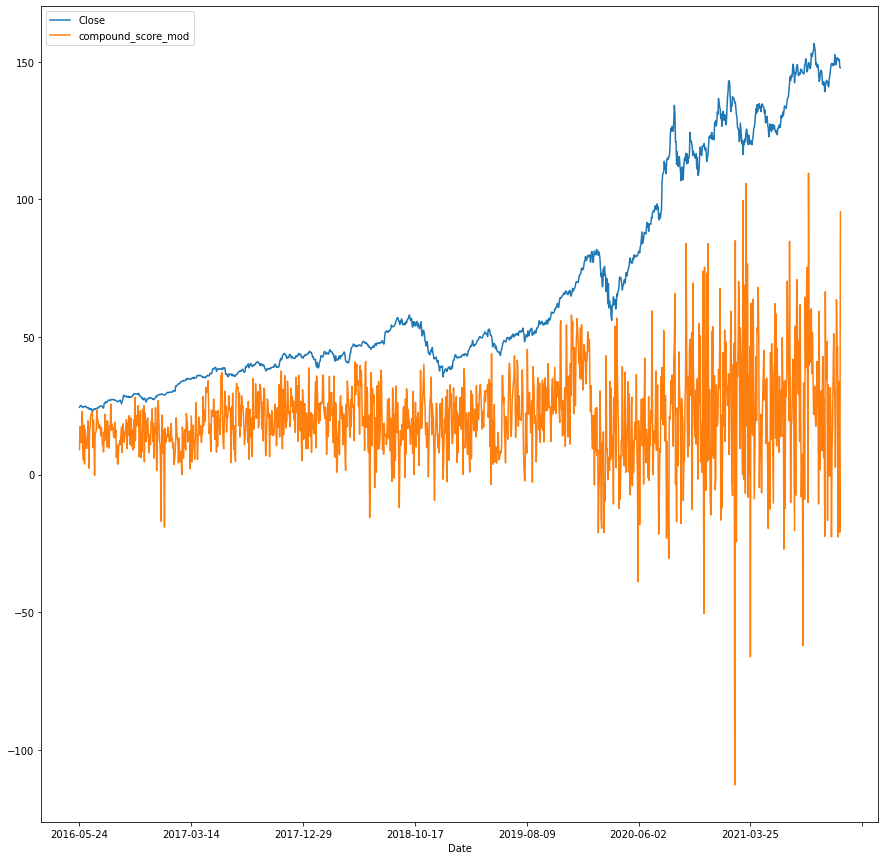

In [16]:
test[['Close', 'compound_score_mod']].plot(figsize = (15,15))

In [17]:
test1 = test.copy()

<AxesSubplot:xlabel='Date'>

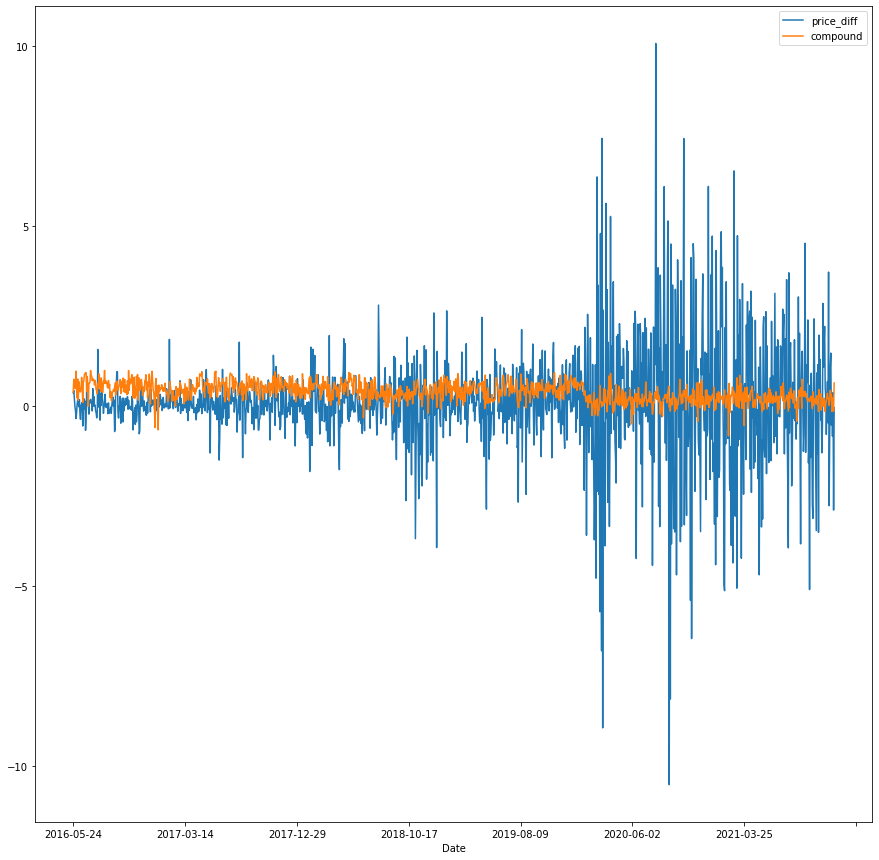

In [18]:
test1[['price_diff', 'compound']].plot(figsize = (15,15))

In [19]:
test1['same_sign'] = test1['price_diff']*test1['compound'] > 0 
print(test1['same_sign'].sum())
print(len(test1))

744
1362


### Linear Regression

In [20]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

In [21]:
xvar, yvar = test1[['SMA20', 'SMA50', 'SMA100']], test1['Close']
x_train, y_train = xvar[:int(0.75*len(xvar))], yvar[:int(0.75*len(yvar))]
x_test, y_test = xvar[int(0.75*len(xvar)):], yvar[int(0.75*len(yvar)):]

In [22]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(x_train, y_train)
y_pred = linear_regression.predict(x_test)

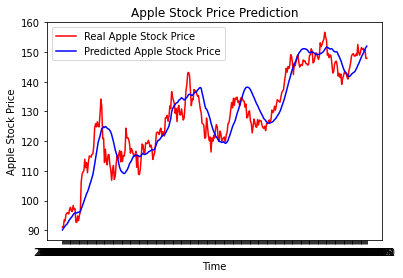

Mean squared error: 29.92
Coefficient of determination: 0.867
Adjusted R Squared: 0.865


In [23]:
pyplot.plot(y_test, color = 'red', label = 'Real Apple Stock Price')
pyplot.plot(y_pred, color = 'blue', label = 'Predicted Apple Stock Price')
pyplot.title('Apple Stock Price Prediction')
pyplot.xlabel('Time')
pyplot.ylabel('Apple Stock Price')
pyplot.legend()
pyplot.show()

print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test, y_pred))  # It is the average of the squared difference between the predicted and actual value.
print("Coefficient of determination: %.3f" % metrics.r2_score(y_test, y_pred))  # This metric represents the part of the variance of the dependent variable explained by the independent variables of the model. It measures the strength of the relationship between your model and the dependent variable.
print("Adjusted R Squared: %.3f" % (1 - (1-metrics.r2_score(y_test, y_pred)) * (len(y_test)-1) / (len(y_test)-x_test.shape[1]-1) ))

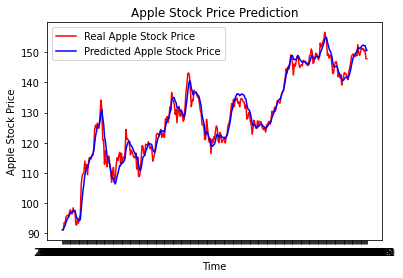

Mean squared error: 5.17
Coefficient of determination: 0.977
Adjusted R Squared: 0.977


In [24]:
xvar, yvar = test1[['EMA10', 'EMA20', 'EMA40']], test1['Close']
x_train, y_train = xvar[:int(0.75*len(xvar))], yvar[:int(0.75*len(yvar))]
x_test, y_test = xvar[int(0.75*len(xvar)):], yvar[int(0.75*len(yvar)):]

linear_regression = linear_model.LinearRegression()
linear_regression.fit(x_train, y_train)
y_pred = linear_regression.predict(x_test)

pyplot.plot(y_test, color = 'red', label = 'Real Apple Stock Price')
pyplot.plot(y_pred, color = 'blue', label = 'Predicted Apple Stock Price')
pyplot.title('Apple Stock Price Prediction')
pyplot.xlabel('Time')
pyplot.ylabel('Apple Stock Price')
pyplot.legend()
pyplot.show()

print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test, y_pred))  # It is the average of the squared difference between the predicted and actual value.
print("Coefficient of determination: %.3f" % metrics.r2_score(y_test, y_pred))  # This metric represents the part of the variance of the dependent variable explained by the independent variables of the model. It measures the strength of the relationship between your model and the dependent variable.
print("Adjusted R Squared: %.3f" % (1 - (1-metrics.r2_score(y_test, y_pred)) * (len(y_test)-1) / (len(y_test)-x_test.shape[1]-1) ))

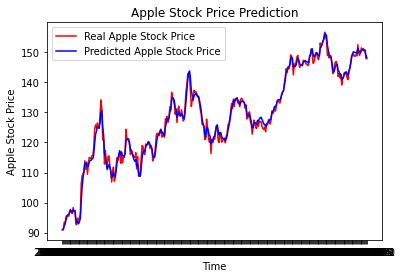

Mean squared error: 2.05
Coefficient of determination: 0.991
Adjusted R Squared: 0.991


In [25]:
xvar, yvar = test1[['EMA10', 'EMA20', 'EMA40', 'MACD', 'Signal', 'RSI']], test1['Close']
x_train, y_train = xvar[:int(0.75*len(xvar))], yvar[:int(0.75*len(yvar))]
x_test, y_test = xvar[int(0.75*len(xvar)):], yvar[int(0.75*len(yvar)):]

linear_regression = linear_model.LinearRegression()
linear_regression.fit(x_train, y_train)
y_pred = linear_regression.predict(x_test)

pyplot.plot(y_test, color = 'red', label = 'Real Apple Stock Price')
pyplot.plot(y_pred, color = 'blue', label = 'Predicted Apple Stock Price')
pyplot.title('Apple Stock Price Prediction')
pyplot.xlabel('Time')
pyplot.ylabel('Apple Stock Price')
pyplot.legend()
pyplot.show()

print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test, y_pred))  # It is the average of the squared difference between the predicted and actual value.
print("Coefficient of determination: %.3f" % metrics.r2_score(y_test, y_pred))  # This metric represents the part of the variance of the dependent variable explained by the independent variables of the model. It measures the strength of the relationship between your model and the dependent variable.
print("Adjusted R Squared: %.3f" % (1 - (1-metrics.r2_score(y_test, y_pred)) * (len(y_test)-1) / (len(y_test)-x_test.shape[1]-1) ))

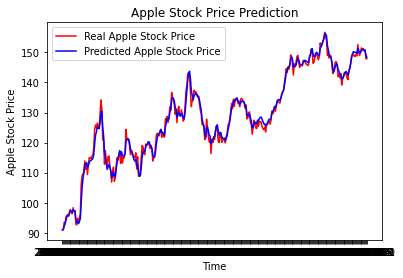

Mean squared error: 2.09
Coefficient of determination: 0.991
Adjusted R Squared: 0.990


In [26]:
xvar, yvar = test1[['EMA10', 'EMA20', 'EMA40', 'MACD', 'Signal', 'RSI', 'TNX', 'Volume']], test1['Close']
x_train, y_train = xvar[:int(0.75*len(xvar))], yvar[:int(0.75*len(yvar))]
x_test, y_test = xvar[int(0.75*len(xvar)):], yvar[int(0.75*len(yvar)):]

linear_regression = linear_model.LinearRegression()
linear_regression.fit(x_train, y_train)
y_pred = linear_regression.predict(x_test)

pyplot.plot(y_test, color = 'red', label = 'Real Apple Stock Price')
pyplot.plot(y_pred, color = 'blue', label = 'Predicted Apple Stock Price')
pyplot.title('Apple Stock Price Prediction')
pyplot.xlabel('Time')
pyplot.ylabel('Apple Stock Price')
pyplot.legend()
pyplot.show()

print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test, y_pred))  # It is the average of the squared difference between the predicted and actual value.
print("Coefficient of determination: %.3f" % metrics.r2_score(y_test, y_pred))  # This metric represents the part of the variance of the dependent variable explained by the independent variables of the model. It measures the strength of the relationship between your model and the dependent variable.
print("Adjusted R Squared: %.3f" % (1 - (1-metrics.r2_score(y_test, y_pred)) * (len(y_test)-1) / (len(y_test)-x_test.shape[1]-1) ))

In [27]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs

In [28]:
test.columns

Index(['neg', 'neu', 'pos', 'compound', 'probability', 'High', 'Low', 'Open',
       'Close', 'Volume', 'Adj Close', 'Movement', 'price_diff', 'TNX',
       'SMA20', 'SMA50', 'SMA100', 'EMA10', 'EMA20', 'EMA40', 'MACD', 'Signal',
       'RSI', 'compound_score_mod'],
      dtype='object')

In [29]:
test2 = test.drop('Close', inplace=False, axis=1)    # inplace=False means the operation would not work on the original object. axis=1 means we are dropping the column, not the row.
test2.drop('Adj Close', inplace=True, axis=1)
test2.drop('price_diff', inplace=True, axis=1)
test2.drop('Movement', inplace=True, axis=1)
test2.drop('High', inplace=True, axis=1)
test2.drop('Low', inplace=True, axis=1)
test2.columns

Index(['neg', 'neu', 'pos', 'compound', 'probability', 'Open', 'Volume', 'TNX',
       'SMA20', 'SMA50', 'SMA100', 'EMA10', 'EMA20', 'EMA40', 'MACD', 'Signal',
       'RSI', 'compound_score_mod'],
      dtype='object')

In [30]:
classifier = linear_model.LinearRegression()
xvar, yvar = test2, test1['Close']
x_train, x_test, y_train, y_test = train_test_split(xvar, yvar, test_size=0.25, random_state=0)

# Build step forward feature selection
forward_selection = sfs(classifier, n_features_to_select = 10, direction='forward', scoring='neg_mean_squared_error', cv=3)

# Perform SFFS
forward_selection = forward_selection.fit(x_train, y_train)

test2.columns[forward_selection.support_]

Index(['neu', 'pos', 'compound', 'probability', 'Open', 'SMA50', 'EMA10',
       'EMA40', 'Signal', 'RSI'],
      dtype='object')

In [31]:
classifier = linear_model.LinearRegression()
xvar, yvar = test2, test1['Close']
x_train, x_test, y_train, y_test = train_test_split(xvar, yvar, test_size=0.25, random_state=0)

# Build step forward feature selection
backward_selection = sfs(classifier, n_features_to_select = 10, direction='backward', scoring='neg_mean_squared_error', cv=3)

# Perform SFFS
backward_selection = backward_selection.fit(x_train, y_train)

test2.columns[backward_selection.support_]

Index(['Open', 'TNX', 'SMA100', 'EMA10', 'EMA20', 'EMA40', 'MACD', 'Signal',
       'RSI', 'compound_score_mod'],
      dtype='object')

### Neural Network (Keras Regression)

#### Using Close Price

In [32]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler

In [33]:
xvar, yvar = test1[['SMA20', 'SMA50', 'SMA100']], test1['Close']
x_train, y_train = xvar[:int(0.75*len(xvar))], yvar[:int(0.75*len(yvar))]
x_test, y_test = xvar[int(0.75*len(xvar)):], yvar[int(0.75*len(yvar)):]

In [34]:
scaler = StandardScaler()
scaler.fit(x_train)     # Only fit scaler to training dataset as test dataset is unseen data
xscaled = scaler.transform(x_train)     # feature scaling is needed for Gradient Descent Based Algorithms - neural netorks (to ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features)
numdim = len(xvar.columns)

kerasmodel = Sequential()
kerasmodel.add(Dense(10, input_dim=numdim, kernel_initializer='normal', activation='relu'))
kerasmodel.add(Dense(10, input_dim=numdim, kernel_initializer='normal', activation='relu'))
kerasmodel.add(Dense(1, kernel_initializer='normal'))
kerasmodel.compile(loss='mean_squared_error', optimizer='adam')
kerasmodel.fit(xscaled, y_train, epochs=50, batch_size=10, verbose=0)

xtestscaled = scaler.transform(x_test)
y_pred = kerasmodel.predict(xtestscaled)

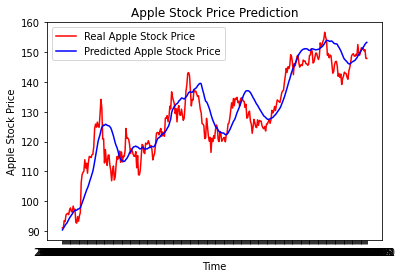

Mean squared error: 30.50
Coefficient of determination: 0.864
Adjusted R Squared: 0.863


In [35]:
pyplot.plot(y_test, color = 'red', label = 'Real Apple Stock Price')
pyplot.plot(y_pred, color = 'blue', label = 'Predicted Apple Stock Price')
pyplot.title('Apple Stock Price Prediction')
pyplot.xlabel('Time')
pyplot.ylabel('Apple Stock Price')
pyplot.legend()
pyplot.show()

print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test, y_pred))  
print("Coefficient of determination: %.3f" % metrics.r2_score(y_test, y_pred))
print("Adjusted R Squared: %.3f" % (1 - (1-metrics.r2_score(y_test, y_pred)) * (len(y_test)-1) / (len(y_test)-x_test.shape[1]-1) ))

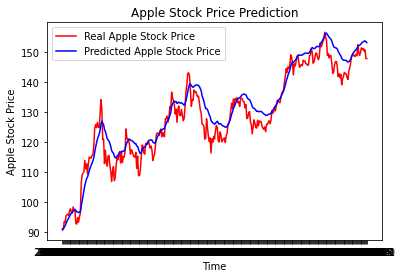

Mean squared error: 18.36
Coefficient of determination: 0.918
Adjusted R Squared: 0.917


In [36]:
xvar, yvar = test1[['EMA10', 'EMA20', 'EMA40']], test1['Close']
x_train, y_train = xvar[:int(0.75*len(xvar))], yvar[:int(0.75*len(yvar))]
x_test, y_test = xvar[int(0.75*len(xvar)):], yvar[int(0.75*len(yvar)):]

scaler = StandardScaler()
scaler.fit(x_train)     # Only fit scaler to training dataset as test dataset is unseen data
xscaled = scaler.transform(x_train)     # feature scaling is needed for Gradient Descent Based Algorithms - neural netorks (to ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features)
numdim = len(xvar.columns)
kerasmodel = Sequential()
kerasmodel.add(Dense(10, input_dim=numdim, kernel_initializer='normal', activation='relu'))
kerasmodel.add(Dense(10, input_dim=numdim, kernel_initializer='normal', activation='relu'))
kerasmodel.add(Dense(1, kernel_initializer='normal'))
kerasmodel.compile(loss='mean_squared_error', optimizer='adam')
kerasmodel.fit(xscaled, y_train, epochs=50, batch_size=10, verbose=0)

xtestscaled = scaler.transform(x_test)
y_pred = kerasmodel.predict(xtestscaled)

pyplot.plot(y_test, color = 'red', label = 'Real Apple Stock Price')
pyplot.plot(y_pred, color = 'blue', label = 'Predicted Apple Stock Price')
pyplot.title('Apple Stock Price Prediction')
pyplot.xlabel('Time')
pyplot.ylabel('Apple Stock Price')
pyplot.legend()
pyplot.show()

print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test, y_pred))  
print("Coefficient of determination: %.3f" % metrics.r2_score(y_test, y_pred))
print("Adjusted R Squared: %.3f" % (1 - (1-metrics.r2_score(y_test, y_pred)) * (len(y_test)-1) / (len(y_test)-x_test.shape[1]-1) ))

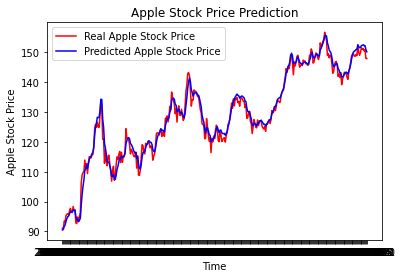

Mean squared error: 3.39
Coefficient of determination: 0.98
Adjusted R Squared: 0.985


In [79]:
xvar, yvar = test1[['EMA10', 'EMA20', 'EMA40', 'MACD', 'Signal', 'RSI']], test1['Close']
x_train, y_train = xvar[:int(0.75*len(xvar))], yvar[:int(0.75*len(yvar))]
x_test, y_test = xvar[int(0.75*len(xvar)):], yvar[int(0.75*len(yvar)):]

scaler = StandardScaler()
scaler.fit(x_train)     # Only fit scaler to training dataset as test dataset is unseen data
xscaled = scaler.transform(x_train)     # feature scaling is needed for Gradient Descent Based Algorithms - neural netorks (to ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features)
numdim = len(xvar.columns)
kerasmodel = Sequential()
kerasmodel.add(Dense(10, input_dim=numdim, kernel_initializer='normal', activation='relu'))
kerasmodel.add(Dense(10, input_dim=numdim, kernel_initializer='normal', activation='relu'))
kerasmodel.add(Dense(1, kernel_initializer='normal'))
kerasmodel.compile(loss='mean_squared_error', optimizer='adam')
kerasmodel.fit(xscaled, y_train, epochs=50, batch_size=10, verbose=0)

xtestscaled = scaler.transform(x_test)
y_pred = kerasmodel.predict(xtestscaled)

pyplot.plot(y_test, color = 'red', label = 'Real Apple Stock Price')
pyplot.plot(y_pred, color = 'blue', label = 'Predicted Apple Stock Price')
pyplot.title('Apple Stock Price Prediction')
pyplot.xlabel('Time')
pyplot.ylabel('Apple Stock Price')
pyplot.legend()
pyplot.show()

print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test, y_pred))  
print("Coefficient of determination: %.2f" % metrics.r2_score(y_test, y_pred))
print("Adjusted R Squared: %.3f" % (1 - (1-metrics.r2_score(y_test, y_pred)) * (len(y_test)-1) / (len(y_test)-x_test.shape[1]-1) ))

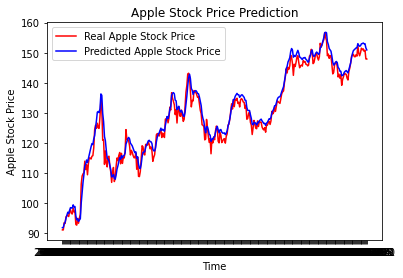

Mean squared error: 5.24
Coefficient of determination: 0.98
Adjusted R Squared: 0.976


In [38]:
xvar, yvar = test1[['EMA10', 'EMA20', 'EMA40', 'MACD', 'Signal', 'RSI', 'TNX', 'Volume']], test1['Close']
x_train, y_train = xvar[:int(0.75*len(xvar))], yvar[:int(0.75*len(yvar))]
x_test, y_test = xvar[int(0.75*len(xvar)):], yvar[int(0.75*len(yvar)):]

scaler = StandardScaler()
scaler.fit(x_train)     # Only fit scaler to training dataset as test dataset is unseen data
xscaled = scaler.transform(x_train)     # feature scaling is needed for Gradient Descent Based Algorithms - neural netorks (to ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features)
numdim = len(xvar.columns)
kerasmodel = Sequential()
kerasmodel.add(Dense(10, input_dim=numdim, kernel_initializer='normal', activation='relu'))
kerasmodel.add(Dense(10, input_dim=numdim, kernel_initializer='normal', activation='relu'))
kerasmodel.add(Dense(1, kernel_initializer='normal'))
kerasmodel.compile(loss='mean_squared_error', optimizer='adam')
kerasmodel.fit(xscaled, y_train, epochs=50, batch_size=10, verbose=0)

xtestscaled = scaler.transform(x_test)
y_pred = kerasmodel.predict(xtestscaled)

pyplot.plot(y_test, color = 'red', label = 'Real Apple Stock Price')
pyplot.plot(y_pred, color = 'blue', label = 'Predicted Apple Stock Price')
pyplot.title('Apple Stock Price Prediction')
pyplot.xlabel('Time')
pyplot.ylabel('Apple Stock Price')
pyplot.legend()
pyplot.show()

print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test, y_pred))  
print("Coefficient of determination: %.2f" % metrics.r2_score(y_test, y_pred))
print("Adjusted R Squared: %.3f" % (1 - (1-metrics.r2_score(y_test, y_pred)) * (len(y_test)-1) / (len(y_test)-x_test.shape[1]-1) ))

#### Using Movement

In [39]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

In [40]:
xvar, yvar = test1[['SMA20', 'SMA50', 'SMA100']], test1['Movement']
x_train, y_train = xvar[:int(0.75*len(xvar))], yvar[:int(0.75*len(yvar))]
x_test, y_test = xvar[int(0.75*len(xvar)):], yvar[int(0.75*len(yvar)):]

scaler = StandardScaler()
scaler.fit(x_train)     # Only fit scaler to training dataset as test dataset is unseen data
xscaled = scaler.transform(x_train)     # feature scaling is needed for Gradient Descent Based Algorithms - neural netorks (to ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features)
xtestscaled = scaler.transform(x_test)

mlp = MLPClassifier(hidden_layer_sizes=(10), max_iter=500)
mlp.fit(xscaled,y_train)
predictions = mlp.predict(xtestscaled)

[[  0 163]
 [  0 178]]
Accuracy: 0.5219941348973607
Precision: 0.5219941348973607
Recall: 1.0
F1 Score: 0.6859344894026975


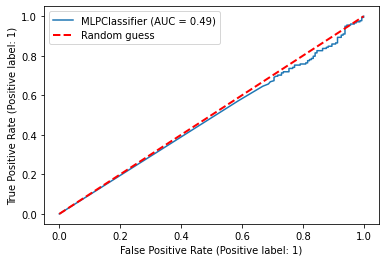

In [41]:
print(confusion_matrix(y_test,predictions))
#plot_confusion_matrix(mlp, x_test, y_test, cmap = 'Blues')
print("Accuracy:", metrics.accuracy_score(y_test, predictions))
print("Precision:", metrics.precision_score(y_test, predictions))
print("Recall:", metrics.recall_score(y_test, predictions))
print("F1 Score:", metrics.f1_score(y_test, predictions))

metrics.plot_roc_curve(mlp, x_test, y_test) 
pyplot.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
pyplot.legend()

[[147  16]
 [153  25]]
Accuracy: 0.5043988269794721
Precision: 0.6097560975609756
Recall: 0.1404494382022472
F1 Score: 0.22831050228310504


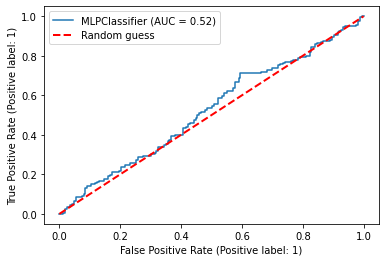

In [42]:
xvar, yvar = test1[['EMA10', 'EMA20', 'EMA40']], test1['Movement']
x_train, y_train = xvar[:int(0.75*len(xvar))], yvar[:int(0.75*len(yvar))]
x_test, y_test = xvar[int(0.75*len(xvar)):], yvar[int(0.75*len(yvar)):]

scaler = StandardScaler()
scaler.fit(x_train)     # Only fit scaler to training dataset as test dataset is unseen data
xscaled = scaler.transform(x_train)     # feature scaling is needed for Gradient Descent Based Algorithms - neural netorks (to ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features)
xtestscaled = scaler.transform(x_test)

mlp = MLPClassifier(hidden_layer_sizes=(10), max_iter=500)
mlp.fit(xscaled,y_train)
predictions = mlp.predict(xtestscaled)

print(confusion_matrix(y_test,predictions))
#plot_confusion_matrix(mlp, x_test, y_test, cmap = 'Blues')
print("Accuracy:", metrics.accuracy_score(y_test, predictions))
print("Precision:", metrics.precision_score(y_test, predictions))
print("Recall:", metrics.recall_score(y_test, predictions))
print("F1 Score:", metrics.f1_score(y_test, predictions))

metrics.plot_roc_curve(mlp, x_test, y_test) 
pyplot.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
pyplot.legend()

[[ 17 146]
 [ 14 164]]
Accuracy: 0.530791788856305
Precision: 0.5290322580645161
Recall: 0.9213483146067416
F1 Score: 0.6721311475409836


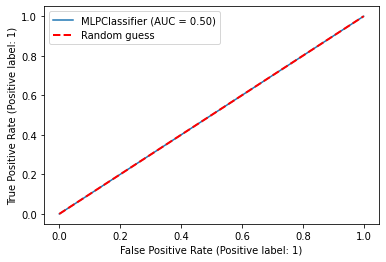

In [43]:
xvar, yvar = test1[['EMA10', 'EMA20', 'EMA40', 'MACD', 'Signal', 'RSI']], test1['Movement']
x_train, y_train = xvar[:int(0.75*len(xvar))], yvar[:int(0.75*len(yvar))]
x_test, y_test = xvar[int(0.75*len(xvar)):], yvar[int(0.75*len(yvar)):]

scaler = StandardScaler()
scaler.fit(x_train)     # Only fit scaler to training dataset as test dataset is unseen data
xscaled = scaler.transform(x_train)     # feature scaling is needed for Gradient Descent Based Algorithms - neural netorks (to ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features)
xtestscaled = scaler.transform(x_test)

mlp = MLPClassifier(hidden_layer_sizes=(10), max_iter=500)
mlp.fit(xscaled,y_train)
predictions = mlp.predict(xtestscaled)

print(confusion_matrix(y_test,predictions))
#plot_confusion_matrix(mlp, x_test, y_test, cmap = 'Blues')
print("Accuracy:", metrics.accuracy_score(y_test, predictions))
print("Precision:", metrics.precision_score(y_test, predictions))
print("Recall:", metrics.recall_score(y_test, predictions))
print("F1 Score:", metrics.f1_score(y_test, predictions))

metrics.plot_roc_curve(mlp, x_test, y_test) 
pyplot.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
pyplot.legend()

[[ 73  90]
 [ 31 147]]
Accuracy: 0.6451612903225806
Precision: 0.620253164556962
Recall: 0.8258426966292135
F1 Score: 0.708433734939759


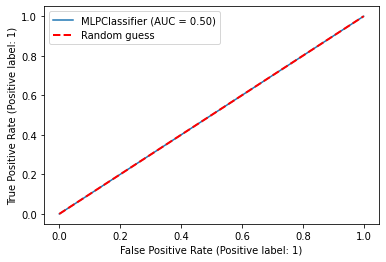

In [44]:
xvar, yvar = test1[['EMA10', 'EMA20', 'EMA40', 'MACD', 'Signal', 'RSI', 'TNX', 'Volume']], test1['Movement']
x_train, y_train = xvar[:int(0.75*len(xvar))], yvar[:int(0.75*len(yvar))]
x_test, y_test = xvar[int(0.75*len(xvar)):], yvar[int(0.75*len(yvar)):]

scaler = StandardScaler()
scaler.fit(x_train)     # Only fit scaler to training dataset as test dataset is unseen data
xscaled = scaler.transform(x_train)     # feature scaling is needed for Gradient Descent Based Algorithms - neural netorks (to ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features)
xtestscaled = scaler.transform(x_test)

mlp = MLPClassifier(hidden_layer_sizes=(10), max_iter=500)
mlp.fit(xscaled,y_train)
predictions = mlp.predict(xtestscaled)

print(confusion_matrix(y_test,predictions))
#plot_confusion_matrix(mlp, x_test, y_test, cmap = 'Blues')
print("Accuracy:", metrics.accuracy_score(y_test, predictions))
print("Precision:", metrics.precision_score(y_test, predictions))
print("Recall:", metrics.recall_score(y_test, predictions))
print("F1 Score:", metrics.f1_score(y_test, predictions))

metrics.plot_roc_curve(mlp, x_test, y_test) 
pyplot.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
pyplot.legend()

### LSTM

#### Univariate (using only Close Price)

In [45]:
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import GlobalMaxPooling1D

In [46]:
df = DataReader("AAPL", 'yahoo', AAPL_start_date, AAPL_end_date) 
xtrain = df[:int(len(df)*0.75+1)].loc[:,'Close'].values
xtest = df[int(len(df)*0.75+1):].loc[:,'Close'].values

In [47]:
xtrain = xtrain.reshape(-1,1)
scaler = StandardScaler()
scaler.fit(xtrain)   # Only fit scaler to training dataset as test dataset is unseen data
xtrain = scaler.transform(xtrain)   # feature scaling is needed for Gradient Descent Based Algorithms - neural netorks (to ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features)
xtest = xtest.reshape(-1,1)
xtest = scaler.transform(xtest)

In [48]:
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

time_steps = 1
x_train, y_train = create_dataset(xtrain, time_steps)

In [49]:
x_train = np.reshape(x_train, (x_train.shape[0], time_steps, 1))    # reshape it to be [samples, time steps, features]
print(x_train.shape)

(1108, 1, 1)


In [50]:
LSTMmodel = Sequential()
LSTMmodel.add(LSTM(200, return_sequences = True))
LSTMmodel.add(Dropout(0.2))
#LSTMmodel.add(LSTM(100, return_sequences = True))
LSTMmodel.add(GlobalMaxPooling1D())
LSTMmodel.add(Dense(100, kernel_initializer='normal', activation='relu'))
LSTMmodel.add(Dense(1, kernel_initializer='normal'))
LSTMmodel.compile(loss='mean_squared_error', optimizer='adam')
history = LSTMmodel.fit(x_train, y_train, epochs=10, batch_size=10, verbose=0)

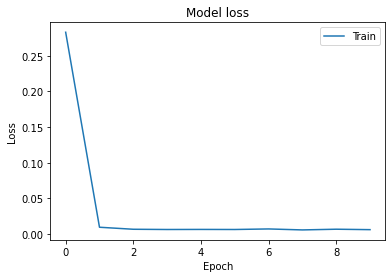

In [51]:
pyplot.plot(history.history['loss'])
#pyplot.plot(history.history['val_loss'])
pyplot.title('Model loss')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
pyplot.legend(['Train', 'Test'], loc='upper right')
pyplot.show()

In [52]:
x_test, y_test = create_dataset(xtest, time_steps)
y_test = y_test.reshape(-1,1)
org_y = scaler.inverse_transform(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], time_steps, 1))    # reshape it to be [samples, time steps, features]

In [53]:
predicted_y = LSTMmodel.predict(x_test)
predicted_y = scaler.inverse_transform(predicted_y)

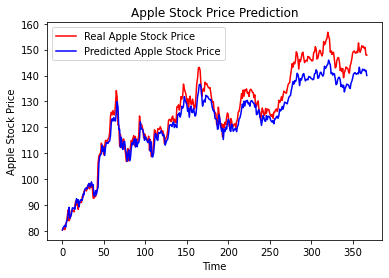

In [54]:
pyplot.plot(org_y, color = 'red', label = 'Real Apple Stock Price')
pyplot.plot(predicted_y, color = 'blue', label = 'Predicted Apple Stock Price')
pyplot.title('Apple Stock Price Prediction')
pyplot.xlabel('Time')
pyplot.ylabel('Apple Stock Price')
pyplot.legend()
pyplot.show()

In [55]:
print("Mean squared error: %.2f" % metrics.mean_squared_error(org_y, predicted_y))  
print("Coefficient of determination: %.2f" % metrics.r2_score(org_y, predicted_y))
print("Adjusted R Squared: %.3f" % (1 - (1-metrics.r2_score(org_y, predicted_y)) * (len(org_y)-1) / (len(org_y)-x_test.shape[1]-1) ))

Mean squared error: 25.47
Coefficient of determination: 0.92
Adjusted R Squared: 0.917


#### Multivariate 

In [56]:
from pandas import DataFrame
from pandas import concat
from numpy import concatenate

In [57]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [58]:
numLSTM = 100
numNeurons = 100

In [59]:
xtrain = test1[:int(len(test1)*0.75+1)].loc[:, ['SMA20', 'SMA50', 'SMA100', 'Close']].values
xtest = test1[int(len(test1)*0.75+1):].loc[:, ['SMA20', 'SMA50', 'SMA100', 'Close']].values

In [60]:
numfeatures = xtrain.shape[1]
xtrain

array([[23.50774984, 25.56934998, 25.04992495, 24.47500038],
       [23.53024988, 25.54454998, 25.03582495, 24.90500069],
       [23.5999999 , 25.51674999, 25.02347496, 25.10250092],
       ...,
       [86.51362419, 79.82664993, 74.75427467, 90.44499969],
       [87.03187408, 80.26599991, 74.85324966, 91.19999695],
       [87.51924896, 80.74469986, 74.96344963, 91.02749634]])

In [61]:
xtrain = xtrain.reshape(-1,numfeatures)
scaler = StandardScaler()
scaler.fit(xtrain)   # Only fit scaler to training dataset as test dataset is unseen data
xtrain = scaler.transform(xtrain)   # feature scaling is needed for Gradient Descent Based Algorithms - neural netorks (to ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features)
xtest = xtest.reshape(-1,numfeatures)
xtest = scaler.transform(xtest)

In [62]:
reframedxtrain = series_to_supervised(xtrain)
reframedxtest = series_to_supervised(xtest)
reframedxtrain

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var1(t),var2(t),var3(t),var4(t)
1,-1.548225,-1.414847,-1.437193,-1.472427,-1.546667,-1.416649,-1.438266,-1.443659
2,-1.546667,-1.416649,-1.438266,-1.443659,-1.541836,-1.418668,-1.439206,-1.430446
3,-1.541836,-1.418668,-1.439206,-1.430446,-1.536114,-1.420648,-1.439656,-1.431450
4,-1.536114,-1.420648,-1.439656,-1.431450,-1.530730,-1.422849,-1.439815,-1.439645
5,-1.530730,-1.422849,-1.439815,-1.439645,-1.527891,-1.425556,-1.439433,-1.463061
...,...,...,...,...,...,...,...,...
1017,2.709191,2.444813,2.321692,2.912295,2.749521,2.474023,2.332384,2.992242
1018,2.749521,2.474023,2.332384,2.992242,2.780415,2.498339,2.339004,2.804751
1019,2.780415,2.498339,2.339004,2.804751,2.814980,2.527029,2.346679,2.941063
1020,2.814980,2.527029,2.346679,2.941063,2.850869,2.558949,2.354214,2.991573


In [63]:
reframedxtrain.drop(reframedxtrain.columns[[4,5,6]], axis=1, inplace=True)     # dropping coloumns not used for prediction
reframedxtest.drop(reframedxtest.columns[[4,5,6]], axis=1, inplace=True)    # dropping coloumns not used for prediction
reframedxtrain

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var4(t)
1,-1.548225,-1.414847,-1.437193,-1.472427,-1.443659
2,-1.546667,-1.416649,-1.438266,-1.443659,-1.430446
3,-1.541836,-1.418668,-1.439206,-1.430446,-1.431450
4,-1.536114,-1.420648,-1.439656,-1.431450,-1.439645
5,-1.530730,-1.422849,-1.439815,-1.439645,-1.463061
...,...,...,...,...,...
1017,2.709191,2.444813,2.321692,2.912295,2.992242
1018,2.749521,2.474023,2.332384,2.992242,2.804751
1019,2.780415,2.498339,2.339004,2.804751,2.941063
1020,2.814980,2.527029,2.346679,2.941063,2.991573


In [64]:
x_train, y_train = reframedxtrain.iloc[:,:-1], reframedxtrain.iloc[:,-1]
x_test, y_test = reframedxtest.iloc[:,:-1], reframedxtest.iloc[:,-1]

In [65]:
x_train = x_train.values.reshape(x_train.shape[0],1,x_train.shape[1])
x_test = x_test.values.reshape(x_test.shape[0],1,x_test.shape[1])

In [66]:
varLSTMmodel = Sequential()
varLSTMmodel.add(LSTM(numLSTM, input_shape = (x_train.shape[1],x_train.shape[2])))
varLSTMmodel.add(Dropout(0.2))
#LSTMmodel.add(GlobalMaxPooling2D())
varLSTMmodel.add(Dense(numNeurons, kernel_initializer='normal', activation='relu'))
varLSTMmodel.add(Dense(1, kernel_initializer='normal'))
varLSTMmodel.compile(loss='mean_squared_error', optimizer='adam')
history = varLSTMmodel.fit(x_train, y_train, epochs=10, batch_size=10, verbose=0)

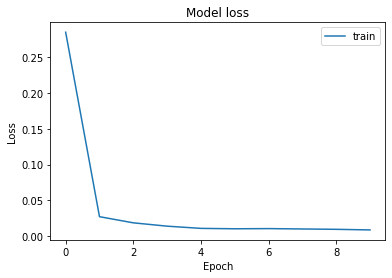

In [67]:
pyplot.plot(history.history['loss'], label='train')
pyplot.title('Model loss')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
pyplot.legend()
pyplot.show()

In [68]:
predicted_y = varLSTMmodel.predict(x_test)
x_test = x_test.reshape((x_test.shape[0],x_test.shape[2]))
inv_predicted_y = concatenate((predicted_y, np.delete(x_test,3,1)), axis=1)     # scaler needs the same dimensions
inv_predicted_y = scaler.inverse_transform(inv_predicted_y)
inv_predicted_y = inv_predicted_y[:,0]  # predicted y after inverting the scaling is in the 1st column

In [69]:
y_test = y_test.values.reshape((len(y_test), 1))
inv_y = concatenate((y_test, np.delete(x_test,3,1)), axis=1)    # scaler needs the same dimensions
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]  # actual y after inverting the scaling is in the 1st column

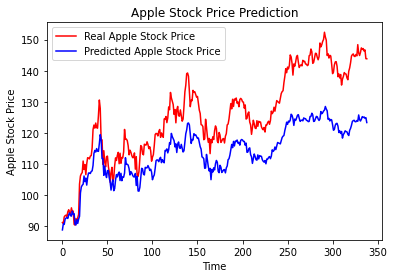

Mean squared error: 174.12
Coefficient of determination: 0.142
Adjusted R Squared: 0.131


In [70]:
pyplot.plot(inv_y, color = 'red', label = 'Real Apple Stock Price')
pyplot.plot(inv_predicted_y, color = 'blue', label = 'Predicted Apple Stock Price')
pyplot.title('Apple Stock Price Prediction')
pyplot.xlabel('Time')
pyplot.ylabel('Apple Stock Price')
pyplot.legend()
pyplot.show()

print("Mean squared error: %.2f" % metrics.mean_squared_error(inv_y, inv_predicted_y))  
print("Coefficient of determination: %.3f" % metrics.r2_score(inv_y, inv_predicted_y))
print("Adjusted R Squared: %.3f" % (1 - (1-metrics.r2_score(inv_y, inv_predicted_y)) * (len(inv_y)-1) / (len(inv_y)-x_test.shape[1]-1) ))

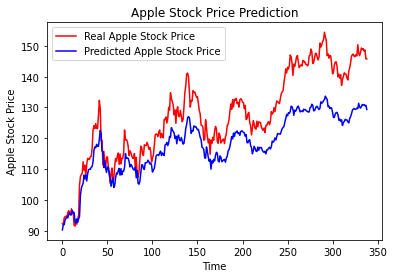

Mean squared error: 114.39
Coefficient of determination: 0.454
Adjusted R Squared: 0.448


In [71]:
xtrain = test1[:int(len(test1)*0.75+1)].loc[:, ['EMA10', 'EMA20', 'EMA40', 'Close']].values
xtest = test1[int(len(test1)*0.75+1):].loc[:, ['EMA10', 'EMA20', 'EMA40', 'Close']].values

numfeatures = xtrain.shape[1]
xtrain = xtrain.reshape(-1,numfeatures)
scaler = StandardScaler()
scaler.fit(xtrain)   # Only fit scaler to training dataset as test dataset is unseen data
xtrain = scaler.transform(xtrain)   # feature scaling is needed for Gradient Descent Based Algorithms - neural netorks (to ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features)
xtest = xtest.reshape(-1,numfeatures)
xtest = scaler.transform(xtest)

reframedxtrain = series_to_supervised(xtrain)
reframedxtest = series_to_supervised(xtest)
reframedxtrain.drop(reframedxtrain.columns[[4,5,6]], axis=1, inplace=True)     # dropping coloumns not used for prediction
reframedxtest.drop(reframedxtest.columns[[4,5,6]], axis=1, inplace=True)    # dropping coloumns not used for prediction

x_train, y_train = reframedxtrain.iloc[:,:-1], reframedxtrain.iloc[:,-1]
x_test, y_test = reframedxtest.iloc[:,:-1], reframedxtest.iloc[:,-1]
x_train = x_train.values.reshape(x_train.shape[0],1,x_train.shape[1])
x_test = x_test.values.reshape(x_test.shape[0],1,x_test.shape[1])

varLSTMmodel = Sequential()
varLSTMmodel.add(LSTM(numLSTM, input_shape = (x_train.shape[1],x_train.shape[2])))
varLSTMmodel.add(Dropout(0.2))
#LSTMmodel.add(GlobalMaxPooling2D())
varLSTMmodel.add(Dense(numNeurons, kernel_initializer='normal', activation='relu'))
varLSTMmodel.add(Dense(1, kernel_initializer='normal'))
varLSTMmodel.compile(loss='mean_squared_error', optimizer='adam')
history = varLSTMmodel.fit(x_train, y_train, epochs=10, batch_size=10, verbose=0)

predicted_y = varLSTMmodel.predict(x_test)
x_test = x_test.reshape((x_test.shape[0],x_test.shape[2]))
inv_predicted_y = concatenate((predicted_y, np.delete(x_test,3,1)), axis=1)     # scaler needs the same dimensions
inv_predicted_y = scaler.inverse_transform(inv_predicted_y)
inv_predicted_y = inv_predicted_y[:,0]  # predicted y after inverting the scaling is in the 1st column

y_test = y_test.values.reshape((len(y_test), 1))
inv_y = concatenate((y_test, np.delete(x_test,3,1)), axis=1)    # scaler needs the same dimensions
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]  # actual y after inverting the scaling is in the 1st column

pyplot.plot(inv_y, color = 'red', label = 'Real Apple Stock Price')
pyplot.plot(inv_predicted_y, color = 'blue', label = 'Predicted Apple Stock Price')
pyplot.title('Apple Stock Price Prediction')
pyplot.xlabel('Time')
pyplot.ylabel('Apple Stock Price')
pyplot.legend()
pyplot.show()

print("Mean squared error: %.2f" % metrics.mean_squared_error(inv_y, inv_predicted_y))  
print("Coefficient of determination: %.3f" % metrics.r2_score(inv_y, inv_predicted_y))
print("Adjusted R Squared: %.3f" % (1 - (1-metrics.r2_score(inv_y, inv_predicted_y)) * (len(inv_y)-1) / (len(inv_y)-x_test.shape[1]-1) ))

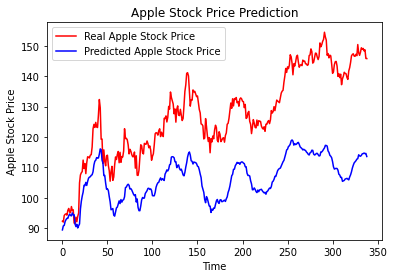

Mean squared error: 509.07
Coefficient of determination: -1.428
Adjusted R Squared: -1.479


In [72]:
xtrain = test1[:int(len(test1)*0.75+1)].loc[:, ['EMA10', 'EMA20', 'EMA40', 'MACD', 'Signal', 'RSI', 'Close']].values
xtest = test1[int(len(test1)*0.75+1):].loc[:, ['EMA10', 'EMA20', 'EMA40', 'MACD', 'Signal', 'RSI', 'Close']].values

numfeatures = xtrain.shape[1]
xtrain = xtrain.reshape(-1,numfeatures)
scaler = StandardScaler()
scaler.fit(xtrain)   # Only fit scaler to training dataset as test dataset is unseen data
xtrain = scaler.transform(xtrain)   # feature scaling is needed for Gradient Descent Based Algorithms - neural netorks (to ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features)
xtest = xtest.reshape(-1,numfeatures)
xtest = scaler.transform(xtest)

reframedxtrain = series_to_supervised(xtrain)
reframedxtest = series_to_supervised(xtest)
reframedxtrain.drop(reframedxtrain.columns[[7,8,9,10,11,12]], axis=1, inplace=True)     # dropping coloumns not used for prediction
reframedxtest.drop(reframedxtest.columns[[7,8,9,10,11,12]], axis=1, inplace=True)    # dropping coloumns not used for prediction

x_train, y_train = reframedxtrain.iloc[:,:-1], reframedxtrain.iloc[:,-1]
x_test, y_test = reframedxtest.iloc[:,:-1], reframedxtest.iloc[:,-1]
x_train = x_train.values.reshape(x_train.shape[0],1,x_train.shape[1])
x_test = x_test.values.reshape(x_test.shape[0],1,x_test.shape[1])

varLSTMmodel = Sequential()
varLSTMmodel.add(LSTM(numLSTM, input_shape = (x_train.shape[1],x_train.shape[2])))
varLSTMmodel.add(Dropout(0.2))
#LSTMmodel.add(GlobalMaxPooling2D())
varLSTMmodel.add(Dense(numNeurons, kernel_initializer='normal', activation='relu'))
varLSTMmodel.add(Dense(1, kernel_initializer='normal'))
varLSTMmodel.compile(loss='mean_squared_error', optimizer='adam')
history = varLSTMmodel.fit(x_train, y_train, epochs=10, batch_size=10, verbose=0)

predicted_y = varLSTMmodel.predict(x_test)
x_test = x_test.reshape((x_test.shape[0],x_test.shape[2]))
inv_predicted_y = concatenate((predicted_y, np.delete(x_test,3,1)), axis=1)     # scaler needs the same dimensions
inv_predicted_y = scaler.inverse_transform(inv_predicted_y)
inv_predicted_y = inv_predicted_y[:,0]  # predicted y after inverting the scaling is in the 1st column

y_test = y_test.values.reshape((len(y_test), 1))
inv_y = concatenate((y_test, np.delete(x_test,3,1)), axis=1)    # scaler needs the same dimensions
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]  # actual y after inverting the scaling is in the 1st column

pyplot.plot(inv_y, color = 'red', label = 'Real Apple Stock Price')
pyplot.plot(inv_predicted_y, color = 'blue', label = 'Predicted Apple Stock Price')
pyplot.title('Apple Stock Price Prediction')
pyplot.xlabel('Time')
pyplot.ylabel('Apple Stock Price')
pyplot.legend()
pyplot.show()

print("Mean squared error: %.2f" % metrics.mean_squared_error(inv_y, inv_predicted_y))  
print("Coefficient of determination: %.3f" % metrics.r2_score(inv_y, inv_predicted_y))
print("Adjusted R Squared: %.3f" % (1 - (1-metrics.r2_score(inv_y, inv_predicted_y)) * (len(inv_y)-1) / (len(inv_y)-x_test.shape[1]-1) ))

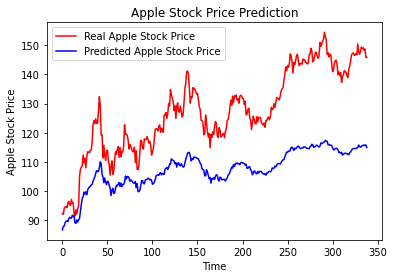

Mean squared error: 458.59
Coefficient of determination: -1.187
Adjusted R Squared: -1.227


In [75]:
xtrain = test1[:int(len(test1)*0.75+1)].loc[:, ['EMA10', 'EMA20', 'EMA40', 'TNX', 'Volume', 'Close']].values
xtest = test1[int(len(test1)*0.75+1):].loc[:, ['EMA10', 'EMA20', 'EMA40', 'TNX', 'Volume', 'Close']].values

numfeatures = xtrain.shape[1]
xtrain = xtrain.reshape(-1,numfeatures)
scaler = StandardScaler()
scaler.fit(xtrain)   # Only fit scaler to training dataset as test dataset is unseen data
xtrain = scaler.transform(xtrain)   # feature scaling is needed for Gradient Descent Based Algorithms - neural netorks (to ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features)
xtest = xtest.reshape(-1,numfeatures)
xtest = scaler.transform(xtest)

reframedxtrain = series_to_supervised(xtrain)
reframedxtest = series_to_supervised(xtest)
reframedxtrain.drop(reframedxtrain.columns[[6,7,8,9,10]], axis=1, inplace=True)     # dropping coloumns not used for prediction
reframedxtest.drop(reframedxtest.columns[[6,7,8,9,10]], axis=1, inplace=True)    # dropping coloumns not used for prediction

x_train, y_train = reframedxtrain.iloc[:,:-1], reframedxtrain.iloc[:,-1]
x_test, y_test = reframedxtest.iloc[:,:-1], reframedxtest.iloc[:,-1]
x_train = x_train.values.reshape(x_train.shape[0],1,x_train.shape[1])
x_test = x_test.values.reshape(x_test.shape[0],1,x_test.shape[1])

varLSTMmodel = Sequential()
varLSTMmodel.add(LSTM(numLSTM, input_shape = (x_train.shape[1],x_train.shape[2])))
varLSTMmodel.add(Dropout(0.2))
#LSTMmodel.add(GlobalMaxPooling2D())
varLSTMmodel.add(Dense(numNeurons, kernel_initializer='normal', activation='relu'))
varLSTMmodel.add(Dense(1, kernel_initializer='normal'))
varLSTMmodel.compile(loss='mean_squared_error', optimizer='adam')
history = varLSTMmodel.fit(x_train, y_train, epochs=10, batch_size=10, verbose=0)

predicted_y = varLSTMmodel.predict(x_test)
x_test = x_test.reshape((x_test.shape[0],x_test.shape[2]))
inv_predicted_y = concatenate((predicted_y, np.delete(x_test,3,1)), axis=1)     # scaler needs the same dimensions
inv_predicted_y = scaler.inverse_transform(inv_predicted_y)
inv_predicted_y = inv_predicted_y[:,0]  # predicted y after inverting the scaling is in the 1st column

y_test = y_test.values.reshape((len(y_test), 1))
inv_y = concatenate((y_test, np.delete(x_test,3,1)), axis=1)    # scaler needs the same dimensions
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]  # actual y after inverting the scaling is in the 1st column

pyplot.plot(inv_y, color = 'red', label = 'Real Apple Stock Price')
pyplot.plot(inv_predicted_y, color = 'blue', label = 'Predicted Apple Stock Price')
pyplot.title('Apple Stock Price Prediction')
pyplot.xlabel('Time')
pyplot.ylabel('Apple Stock Price')
pyplot.legend()
pyplot.show()

print("Mean squared error: %.2f" % metrics.mean_squared_error(inv_y, inv_predicted_y))  
print("Coefficient of determination: %.3f" % metrics.r2_score(inv_y, inv_predicted_y))
print("Adjusted R Squared: %.3f" % (1 - (1-metrics.r2_score(inv_y, inv_predicted_y)) * (len(inv_y)-1) / (len(inv_y)-x_test.shape[1]-1) ))

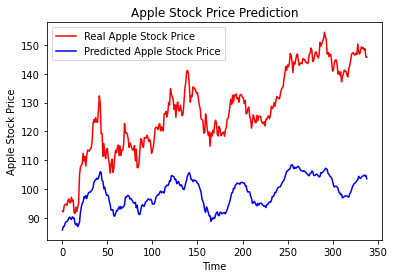

Mean squared error: 917.86
Coefficient of determination: -3.378
Adjusted R Squared: -3.497


In [74]:
xtrain = test1[:int(len(test1)*0.75+1)].loc[:, ['EMA10', 'EMA20', 'EMA40', 'MACD', 'Signal', 'RSI', 'TNX', 'Volume', 'Close']].values
xtest = test1[int(len(test1)*0.75+1):].loc[:, ['EMA10', 'EMA20', 'EMA40', 'MACD', 'Signal', 'RSI', 'TNX', 'Volume', 'Close']].values

numfeatures = xtrain.shape[1]
xtrain = xtrain.reshape(-1,numfeatures)
scaler = StandardScaler()
scaler.fit(xtrain)   # Only fit scaler to training dataset as test dataset is unseen data
xtrain = scaler.transform(xtrain)   # feature scaling is needed for Gradient Descent Based Algorithms - neural netorks (to ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features)
xtest = xtest.reshape(-1,numfeatures)
xtest = scaler.transform(xtest)

reframedxtrain = series_to_supervised(xtrain)
reframedxtest = series_to_supervised(xtest)
reframedxtrain.drop(reframedxtrain.columns[[9,10,11,12,13,14,15,16]], axis=1, inplace=True)     # dropping coloumns not used for prediction
reframedxtest.drop(reframedxtest.columns[[9,10,11,12,13,14,15,16]], axis=1, inplace=True)    # dropping coloumns not used for prediction

x_train, y_train = reframedxtrain.iloc[:,:-1], reframedxtrain.iloc[:,-1]
x_test, y_test = reframedxtest.iloc[:,:-1], reframedxtest.iloc[:,-1]
x_train = x_train.values.reshape(x_train.shape[0],1,x_train.shape[1])
x_test = x_test.values.reshape(x_test.shape[0],1,x_test.shape[1])

varLSTMmodel = Sequential()
varLSTMmodel.add(LSTM(numLSTM, input_shape = (x_train.shape[1],x_train.shape[2])))
varLSTMmodel.add(Dropout(0.2))
#LSTMmodel.add(GlobalMaxPooling2D())
varLSTMmodel.add(Dense(numNeurons, kernel_initializer='normal', activation='relu'))
varLSTMmodel.add(Dense(1, kernel_initializer='normal'))
varLSTMmodel.compile(loss='mean_squared_error', optimizer='adam')
history = varLSTMmodel.fit(x_train, y_train, epochs=10, batch_size=10, verbose=0)

predicted_y = varLSTMmodel.predict(x_test)
x_test = x_test.reshape((x_test.shape[0],x_test.shape[2]))
inv_predicted_y = concatenate((predicted_y, np.delete(x_test,3,1)), axis=1)     # scaler needs the same dimensions
inv_predicted_y = scaler.inverse_transform(inv_predicted_y)
inv_predicted_y = inv_predicted_y[:,0]  # predicted y after inverting the scaling is in the 1st column

y_test = y_test.values.reshape((len(y_test), 1))
inv_y = concatenate((y_test, np.delete(x_test,3,1)), axis=1)    # scaler needs the same dimensions
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]  # actual y after inverting the scaling is in the 1st column

pyplot.plot(inv_y, color = 'red', label = 'Real Apple Stock Price')
pyplot.plot(inv_predicted_y, color = 'blue', label = 'Predicted Apple Stock Price')
pyplot.title('Apple Stock Price Prediction')
pyplot.xlabel('Time')
pyplot.ylabel('Apple Stock Price')
pyplot.legend()
pyplot.show()

print("Mean squared error: %.2f" % metrics.mean_squared_error(inv_y, inv_predicted_y))  
print("Coefficient of determination: %.3f" % metrics.r2_score(inv_y, inv_predicted_y))
print("Adjusted R Squared: %.3f" % (1 - (1-metrics.r2_score(inv_y, inv_predicted_y)) * (len(inv_y)-1) / (len(inv_y)-x_test.shape[1]-1) ))

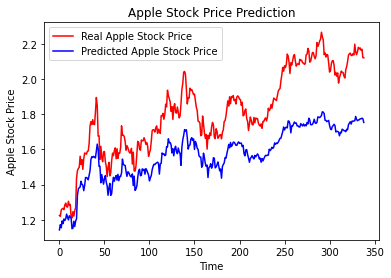

Mean squared error: 0.07
Coefficient of determination: -0.129
Adjusted R Squared: -0.143


In [78]:
xtrain = test1[:int(len(test1)*0.75+1)].loc[:, ['compound', 'probability', 'Movement', 'Close']].values
xtest = test1[int(len(test1)*0.75+1):].loc[:, ['compound', 'probability', 'Movement', 'Close']].values

numfeatures = xtrain.shape[1]
xtrain = xtrain.reshape(-1,numfeatures)
scaler = StandardScaler()
scaler.fit(xtrain)   # Only fit scaler to training dataset as test dataset is unseen data
xtrain = scaler.transform(xtrain)   # feature scaling is needed for Gradient Descent Based Algorithms - neural netorks (to ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features)
xtest = xtest.reshape(-1,numfeatures)
xtest = scaler.transform(xtest)

reframedxtrain = series_to_supervised(xtrain)
reframedxtest = series_to_supervised(xtest)
reframedxtrain.drop(reframedxtrain.columns[[4,5,6]], axis=1, inplace=True)     # dropping coloumns not used for prediction
reframedxtest.drop(reframedxtest.columns[[4,5,6]], axis=1, inplace=True)    # dropping coloumns not used for prediction

x_train, y_train = reframedxtrain.iloc[:,:-1], reframedxtrain.iloc[:,-1]
x_test, y_test = reframedxtest.iloc[:,:-1], reframedxtest.iloc[:,-1]
x_train = x_train.values.reshape(x_train.shape[0],1,x_train.shape[1])
x_test = x_test.values.reshape(x_test.shape[0],1,x_test.shape[1])

varLSTMmodel = Sequential()
varLSTMmodel.add(LSTM(numLSTM, input_shape = (x_train.shape[1],x_train.shape[2])))
varLSTMmodel.add(Dropout(0.2))
#LSTMmodel.add(GlobalMaxPooling2D())
varLSTMmodel.add(Dense(numNeurons, kernel_initializer='normal', activation='relu'))
varLSTMmodel.add(Dense(1, kernel_initializer='normal'))
varLSTMmodel.compile(loss='mean_squared_error', optimizer='adam')
history = varLSTMmodel.fit(x_train, y_train, epochs=10, batch_size=10, verbose=0)

predicted_y = varLSTMmodel.predict(x_test)
x_test = x_test.reshape((x_test.shape[0],x_test.shape[2]))
inv_predicted_y = concatenate((predicted_y, np.delete(x_test,3,1)), axis=1)     # scaler needs the same dimensions
inv_predicted_y = scaler.inverse_transform(inv_predicted_y)
inv_predicted_y = inv_predicted_y[:,0]  # predicted y after inverting the scaling is in the 1st column

y_test = y_test.values.reshape((len(y_test), 1))
inv_y = concatenate((y_test, np.delete(x_test,3,1)), axis=1)    # scaler needs the same dimensions
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]  # actual y after inverting the scaling is in the 1st column

pyplot.plot(inv_y, color = 'red', label = 'Real Apple Stock Price')
pyplot.plot(inv_predicted_y, color = 'blue', label = 'Predicted Apple Stock Price')
pyplot.title('Apple Stock Price Prediction')
pyplot.xlabel('Time')
pyplot.ylabel('Apple Stock Price')
pyplot.legend()
pyplot.show()

print("Mean squared error: %.2f" % metrics.mean_squared_error(inv_y, inv_predicted_y))  
print("Coefficient of determination: %.3f" % metrics.r2_score(inv_y, inv_predicted_y))
print("Adjusted R Squared: %.3f" % (1 - (1-metrics.r2_score(inv_y, inv_predicted_y)) * (len(inv_y)-1) / (len(inv_y)-x_test.shape[1]-1) ))